In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

mu = 0.7
bern = stats.bernoulli(mu)

In [14]:
mu = 0.7
bern = stats.bernoulli(mu)

In [16]:
b_x = [0, 1]
bern_pmf = bern.pmf(b_x)

plt.bar(b_x, bern_pmf)
plt.xlim(-1,2)
plt.ylim(0,1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [18]:
x_sample_bern = bern.rvs(100, random_state=0)

In [19]:
x_sample_bern

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [20]:
y_bern = np.bincount(x_sample_bern, minlength=2) / float(len(x_sample_bern))

df_bern = pd.DataFrame({"결과": bern_pmf, "검증(시뮬레이션)": y_bern})
df_bern.index = [0, 1]
df_bern

결과  검증(시뮬레이션)
0  0.3       0.23
1  0.7       0.77

In [21]:
print("k=3,n=15,p=0.3의 PMF:",stats.binom.pmf(3, n=15, p=0.3))
print("k=0~4,n=15,p=0.3의 PMF:",stats.binom.cdf(3, n=15, p=0.3))

k=3,n=15,p=0.3의 PMF: 0.17004021326428484
k=0~4,n=15,p=0.3의 PMF: 0.29686792788704786


In [22]:
def bion_dist(k,n,p):
    pmf_bion = stats.binom.pmf(k, n=n, p=p)
    return pmf_bion


In [24]:
x = np.arange(0,16)
pdf_result = [bion_dist(k, 15, 0.3) for k in range (0,16)]

In [25]:
plt.title("확률질량함수 ")
plt.ylim(0, 0.3)
plt.text(12.5, 0.28, 'n, p = 15, 0.3')
plt.bar(x, pdf_result, color='mediumaquamarine')
plt.show()

In [26]:
stats.poisson.pmf (3,2,loc=0)

0.18044704431548356

In [35]:
def pois_dist(n, lamb):
    pmf_poi = stats.poisson.pmf(n, lamb, loc=0)
    return pmf_poi


In [36]:
x = np.arange(0,41)
poi_pdf_result = [pois_dist(n, 10) for n in range(0,41)]

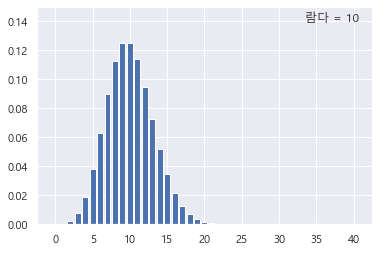

In [37]:
plt.ylim(0, 0.15)
plt.text(33.5, 0.14, '람다 = 10')
plt.bar(x, poi_pdf_result)
plt.show()

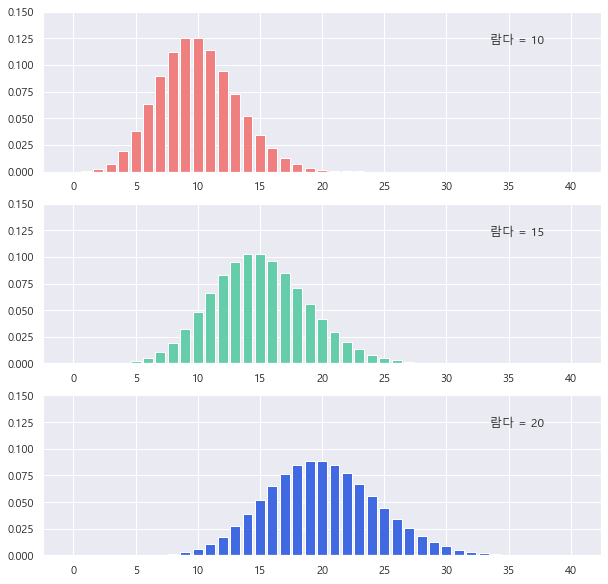

In [38]:
## 기대값에 따른 포아송 분포 차이 확인

x = np.arange(0,41)

fig = plt.figure(figsize = (10,10))

fig.add_subplot(3,1,1)
pmf_poin1 = np.array([pois_dist(n, 10) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 10')
plt.bar(x, pmf_poin1, color='lightcoral')

fig.add_subplot(3,1,2)
pmf_poin2 = np.array([pois_dist(n, 15) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 15')
plt.bar(x, pmf_poin2, color='mediumaquamarine')

fig.add_subplot(3,1,3)
pmf_poin3 = np.array([pois_dist(n, 20) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 20')
plt.bar(x, pmf_poin3, color='royalblue')

plt.show()